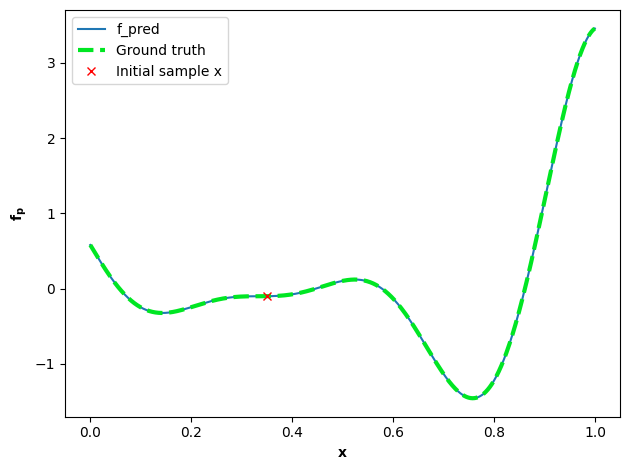

In [2]:
import GPy
import GPyOpt
import numpy as np
import matplotlib.pyplot as plt

#Modelling f_pred
f_pred = lambda X: np.sin(12*X - 4) * (6*X - 2)**2
bounds = np.array([[0, 1]])
X = np.arange(bounds[0, 0], bounds[0, 1], 0.001).reshape(-1, 1)
Y = f_pred(X)
X_init = np.array([X[350]])

import sklearn 
# Plot optimization objective with noise level 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = scaler.fit_transform(Y)
Y_init = np.array([Y[350]])

plt.plot(X, Y, label='f_pred')
plt.plot(X, Y, '--', lw=3, color = '#00E623',label='Ground truth')
plt.plot(X_init, Y_init, 'rx', label='Initial sample x')
plt.xlabel(r"$\bf{x}$")
plt.ylabel(r"$\bf{f_{p}}$")
plt.legend()
plt.subplots_adjust(hspace=0)
plt.tight_layout()
# plt.savefig("Introduction_gt.eps", format = 'eps', dpi=300)
# plt.savefig("Introduction_gt.png", dpi=300)

In [ ]:
#References on acquistion function development
#1) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_creating_new_aquisitions.ipynb
#2) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_modular_bayesian_optimization.ipynb

from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.core.task.cost import constant_cost_withGradients
    
class UCB(AcquisitionBase):
    
    """
    General template to create a new GPyOPt acquisition function

    :param model: GPyOpt class of model
    :param space: GPyOpt class of domain
    :param optimizer: optimizer of the acquisition. Should be a GPyOpt optimizer
    :param cost_withGradients: function that provides the evaluation cost and its gradients

    """

    # --- Set this line to true if analytical gradients are available
    analytical_gradient_prediction = False

    def __init__(self, model, space, optimizer, cost_withGradients=None, **kwargs):
        self.optimizer = optimizer
        super(UCB, self).__init__(model, space, optimizer)

    def _compute_acq(self,x):
        m, s = self.model.predict(x)   
        f_acqu = -m + 2*s
        return f_acqu
import matplotlib.pyplot as plt
#Initializing domain from bounds
domain = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]

#Initializing useful parameters
kernel = GPy.kern.Matern32(input_dim=X_init.shape[1])
objective = GPyOpt.core.task.SingleObjective(f_pred)
space = GPyOpt.Design_space(space = domain)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False, kernel = kernel)
model.noise_var = 0
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
acquisition = UCB(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

#Initializing D_explain
X_init = np.array([X[350]])
Y_init = np.array([Y[350]])
X_step = X_init
Y_step = Y_init

#Run for 10 iterations
max_iter = 30

for iteration in range(max_iter):
    filename = f"fig_{iteration}"                       
    bo_step = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, X_init = X_step, Y_init = Y_step)

    #Take suggestion from f_suggest
    x_next = bo_step.suggest_next_locations()
    y_next = f_pred(x_next)
    
    #Concatenating new values to D_explain
    X_step = np.vstack((X_step, x_next))
    Y_step = np.vstack((Y_step, y_next))
    
    #Plot acquisition plots
    bo_step.plot_acquisition(f_pred = Y, label_x = r"$\bf{x}$", label_y = r"$\bf{f_{e}}$", filename = filename)

In [ ]:
from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.core.task.cost import constant_cost_withGradients
    
class UR(AcquisitionBase):
    
    """
    General template to create a new GPyOPt acquisition function

    :param model: GPyOpt class of model
    :param space: GPyOpt class of domain
    :param optimizer: optimizer of the acquisition. Should be a GPyOpt optimizer
    :param cost_withGradients: function that provides the evaluation cost and its gradients

    """

    # --- Set this line to true if analytical gradients are available
    analytical_gradient_prediction = False

    def __init__(self, model, space, optimizer, cost_withGradients=None, **kwargs):
        self.optimizer = optimizer
        super(UR, self).__init__(model, space, optimizer)

    def _compute_acq(self,x):
        m, s = self.model.predict(x)   
        f_acqu = s
        return f_acqu

#Initializing domain from bounds
domain = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]

#Initializing useful parameters
kernel = GPy.kern.Matern32(input_dim=X_init.shape[1])
objective = GPyOpt.core.task.SingleObjective(f_pred)
space = GPyOpt.Design_space(space = domain)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False, kernel = kernel)
model.noise_var = 0
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
acquisition = UR(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

#Initializing D_explain
X_init = np.array([X[350]])
Y_init = np.array([Y[350]])
X_step = X_init
Y_step = Y_init

#Run for 10 iterations
max_iter = 30

for iteration in range(max_iter):
    filename = f"fig_{iteration}"
    bo_step = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, X_init = X_step, Y_init = Y_step)

    #Take suggestion from f_suggest
    x_next = bo_step.suggest_next_locations()
    y_next = f_pred(x_next)
    
    #Concatenating new values to D_explain
    X_step = np.vstack((X_step, x_next))
    Y_step = np.vstack((Y_step, y_next))
    
    #Plot acquisition plots
    bo_step.plot_acquisition(f_pred = Y, label_x = r"$\bf{x}$", label_y = r"$\bf{f_{e}}$", filename = filename)

X_init:  [[0.35]]
Y_init:  [[-0.10011252]]
X_step:  [[0.35]]
Y_step:  [[-0.10011252]]
filename:  fig_0
bo_step:  <GPyOpt.methods.modular_bayesian_optimization.ModularBayesianOptimization object at 0x7f1a60fa4340>
x_next:  [[0.64157846]]
y_next:  [[-1.80925522]]
X_step:  [[0.35      ]
 [0.64157846]]
Y_step:  [[-0.10011252]
 [-1.80925522]]
0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

filename:  fig_1
bo_step:  <GPyOpt.methods.modular_bayesian_optimization.ModularBayesianOptimization object at 0x7f1a5ee6ff40>
x_next:  [[0.31704624]]
y_next:  [[-0.00185458]]
X_step:  [[0.35      ]
 [0.64157846]
 [0.31704624]]
Y_step:  [[-0.10011252]
 [-1.80925522]
 [-0.00185458]]
1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

filename:  fig_2
bo_step:  <GPyOpt.methods.modular_bayesian_optimization.ModularBayesianOptimization object at 0x7f1a5edc3100>
x_next:  [[0.95894597]]
y_next:  [[13.25204553]]
X_step:  [[0.35      ]
 [0.64157846]
 [0.31704624]
 [0.95894597]]
Y_step:  [[-1.00112521e-01]
 [-1.80925522e+00]
 [-1.85458272e-03]
 [ 1.32520455e+01]]
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

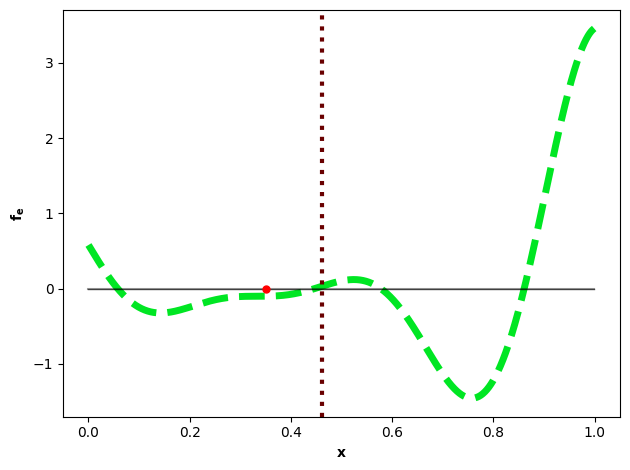

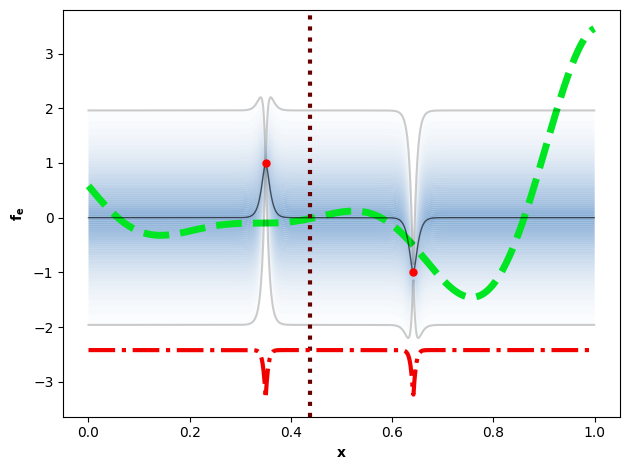

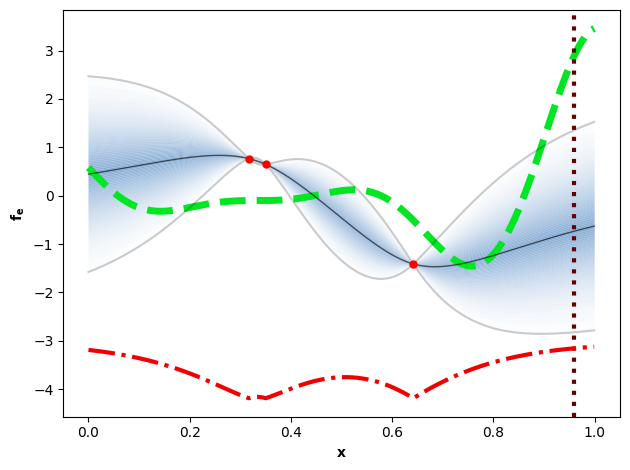

In [3]:
#References
#1) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_creating_new_aquisitions.ipynb
#2) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_modular_bayesian_optimization.ipynb

from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.core.task.cost import constant_cost_withGradients
    
class FaithfulUncertaintyReduction(AcquisitionBase):
    
    """
    General template to create a new GPyOPt acquisition function

    :param model: GPyOpt class of model
    :param space: GPyOpt class of domain
    :param optimizer: optimizer of the acquisition. Should be a GPyOpt optimizer
    :param cost_withGradients: function that provides the evaluation cost and its gradients

    """

    # --- Set this line to true if analytical gradients are available
    analytical_gradient_prediction = False

    def __init__(self, model, space, optimizer, X_init, var, cost_withGradients=None, **kwargs):
        self.optimizer = optimizer
        self.X_init = X_init
        self.Y_init = Y_init
        self.var = var
        self.iter = 1
        self.delta = np.random.randn()
        super(FaithfulUncertaintyReduction, self).__init__(model, space, optimizer)

    def _compute_acq(self,x):
        if x.shape[0]>1:
            self.iter += 1
            self.delta = np.random.randn()
        m, s = self.model.predict(x)
        f_acqu = -np.linalg.norm(x-self.X_init - self.var*self.delta/np.log(self.iter))+ s #ALSO AWESOME!!!! If this works, that'd be much better because same stratgey might not work wiht datasets of diffeten vairance. Also this is a generalization of the delta/iter function with var=1
        return f_acqu
    
    #exp(-self.iter), dividing by square
    def _compute_acq_withGradients(self, x):
        m, s, dmdx, dsdx = self.model.predict_withGradients(x) 
        f_acqu = -np.linalg.norm(x-self.X_init-1)
        df_acqu = np.gradient(f_acqu)
        return f_acqu, df_acqu

#Initializing domain from bounds
domain = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]

#Initializing useful parameters
kernel = GPy.kern.Matern32(input_dim=X_init.shape[1])
objective = GPyOpt.core.task.SingleObjective(f_pred)
space = GPyOpt.Design_space(space = domain)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
model = GPyOpt.models.GPModel(verbose=False, kernel = kernel)
model.noise_var = 0
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
acquisition = FaithfulUncertaintyReduction(model, space, optimizer=aquisition_optimizer, X_init = X_init,var=np.std(X))
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

#Initializing D_explain
X_init = np.array([X[350]])
Y_init = np.array([Y[350]])
X_step = X_init
Y_step = Y_init


print("X_init: ", X_init)
print("Y_init: ", Y_init)
print("X_step: ", X_step)
print("Y_step: ", Y_step)

#Run for 10 iterations
max_iter = 3

for iteration in range(max_iter):
    filename = f"fig_{iteration}"
    print("filename: ", filename)                       
    bo_step = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, X_init = X_step, Y_init = Y_step)
    print("bo_step: ", bo_step)
    #Take suggestion from f_suggest
    x_next = bo_step.suggest_next_locations()
    print("x_next: ", x_next )
    y_next = f_pred(x_next)
    print("y_next: ", y_next)

    #Concatenating new values to D_explain
    X_step = np.vstack((X_step, x_next))
    Y_step = np.vstack((Y_step, y_next))
    
    print("X_step: ", X_step)
    print("Y_step: ", Y_step)

    #Plot acquisition plots
    print(iteration)
    bo_step.plot_acquisition(f_pred = Y, label_x = r"$\bf{x}$", label_y = r"$\bf{f_{e}}$", filename = filename)

In [5]:
#References
#1) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_creating_new_aquisitions.ipynb
#2) https://github.com/SheffieldML/GPyOpt/blob/master/manual/GPyOpt_modular_bayesian_optimization.ipynb

# f_pred = lambda X: np.sin(12*X - 4) * (6*X - 2)**2
# bounds = np.array([[0, 1]])
# X = np.arange(bounds[0, 0], bounds[0, 1], 1/900).reshape(-1, 30)
# Y = f_pred(X)
# X_init = np.array([X[10]])

f_pred = lambda X: np.sin(12*X - 4) * (6*X - 2)**2
bounds = np.array([[0, 1]])
X = np.arange(bounds[0, 0], bounds[0, 1], 0.001).reshape(-1, 1)
Y = f_pred(X)
X_init = np.array([X[350]])


from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.core.task.cost import constant_cost_withGradients
    
class IF_FaithfulUncertaintyReduction(AcquisitionBase):
    
    """
    General template to create a new GPyOPt acquisition function

    :param model: GPyOpt class of model
    :param space: GPyOpt class of domain
    :param optimizer: optimizer of the acquisition. Should be a GPyOpt optimizer
    :param cost_withGradients: function that provides the evaluation cost and its gradients

    """

    # --- Set this line to true if analytical gradients are available
    analytical_gradient_prediction = False

    def __init__(self, model, space, optimizer, X_init, var, cost_withGradients=None, **kwargs):
        self.optimizer = optimizer
        self.X_init = X_init
        self.Y_init = Y_init
        self.var = var
        self.iter = 1
        self.delta = np.random.randn()
        super(IF_FaithfulUncertaintyReduction, self).__init__(model, space, optimizer)

    def _compute_IF(self,x):
        import numpy as np
        import argparse
        import time
        import pdb
        import os
        np.random.seed(0)

        from scipy import sparse
        from sklearn.linear_model import LogisticRegression
        from sklearn.linear_model import Ridge
        from sklearn.metrics import log_loss, roc_auc_score
        import sys
        sys.path.insert(0, os.path.dirname(os.getcwd()))

        sys.path.append('..')
        from grad_utils import grad_logloss_theta_lr
        from grad_utils import batch_grad_logloss_lr
        from inverse_hvp import inverse_hvp_lr_newtonCG

        #Loading black box utilities
        from evaluation.blackbox_util import BlackBoxSimulator
        dataset_utilities = BlackBoxSimulator().load_breast_cancer_utilities()
        [X_train, y_train, X_test, y_test, features, model, mode, categorical_features, sample_idx] = dataset_utilities.values()
        
        x_va = X_train[-50:]
        y_va = y_train[-50:]
        X_train = X_train[:512-50]
        y_train = y_train[:512-50]

        print(X_train.shape)
        print(y_train.shape)
        print(x_va.shape)
        print(y_va.shape)
        print(X_test.shape)
        print(y_test.shape)

        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
  
        X_train = sc.fit_transform(X_train)
        x_va = sc.fit_transform(x_va)
        X_test = sc.transform(X_test) 
        
        from sklearn.decomposition import PCA
        pca = PCA(n_components = 1)
  
        X_train = pca.fit_transform(X_train)
        x_va = pca.fit_transform(x_va)
        X_test = pca.transform(X_test)
  
        print(X_train.shape)
        print(y_train.shape)
        print(x_va.shape)
        print(y_va.shape)
        print(X_test.shape)
        print(y_test.shape)
    
        sigmoid_k = 10
        C = 0.1
        sample_ratio = 0.6
        flip_ratio = 0.4
        num_tr_sample = X_train.shape[0]
        obj_sample_size = int(sample_ratio * num_tr_sample)

        clf = LogisticRegression(
                C = C,
                fit_intercept=False,
                tol = 1e-8,
                solver="liblinear",
                multi_class="ovr",
                max_iter=10,
                warm_start=False,
                verbose=0,
                )


        clf.fit(X_train,y_train)
        y_va_pred = clf.predict_proba(x_va)[:,1]
        full_logloss = log_loss(y_va,y_va_pred)
        weight_ar = clf.coef_.flatten()
        y_te_pred = clf.predict_proba(X_test)[:,1]
        full_te_logloss = log_loss(y_test,y_te_pred)
        full_te_auc = roc_auc_score(y_test, y_te_pred)
        y_te_pred = clf.predict(X_test)
        full_te_acc = (y_test == y_te_pred).sum() / y_test.shape[0]

        if_start_time = time.time()
        test_grad_loss_val = grad_logloss_theta_lr(y_va,y_va_pred,x_va,weight_ar,C,False,0.1/(num_tr_sample*C))
        tr_pred = clf.predict_proba(X_train)[:,1]
        batch_size = 100
        M = None
        total_batch = int(np.ceil(num_tr_sample / float(batch_size)))
        for idx in range(total_batch):
            batch_tr_grad = batch_grad_logloss_lr(y_train[idx*batch_size:(idx+1)*batch_size],
                tr_pred[idx*batch_size:(idx+1)*batch_size],
                X_train[idx*batch_size:(idx+1)*batch_size],
                weight_ar,
                C,
                False,
                1.0)

            sum_grad = batch_tr_grad.multiply(X_train[idx*batch_size:(idx+1)*batch_size]).sum(0)
            if M is None:
                M = sum_grad
            else:
                M = M + sum_grad
                
        M = M + 0.1/(num_tr_sample*C) * np.ones(X_train.shape[1])
        M = np.array(M).flatten()

        print("x: ", x.shape)
        print("X_init: ", self.X_init.shape)
        y_x = clf.predict(x)
        #y_x0 = clf.predict(self.X_init)

        print("lr done")

        #X_train_orig = np.concatenate((X_train, self.X_init))
        #y_train_orig = np.concatenate((y_train, y_x0))
        X_train_pert = np.concatenate((X_train, x))
        y_train_pert = np.concatenate((y_train, y_x))
        #tr_pred_orig = np.concatenate((tr_pred, y_x0))
        tr_pred_pert = np.concatenate((tr_pred, y_x))

        # iv_hvp_orig = inverse_hvp_lr_newtonCG(X_train_orig,y_train_orig,tr_pred_orig,test_grad_loss_val,C,True,1e-5,True,M,0.1/((num_tr_sample+1)*C))
        iv_hvp_perturbed = inverse_hvp_lr_newtonCG(X_train_pert,y_train_pert,tr_pred_pert,test_grad_loss_val,C,True,1e-5,True,M,0.1/((num_tr_sample+1)*C))
        
        # IF = -1 * (iv_hvp_perturbed - iv_hvp_orig) 
        IF =  -1 * np.linalg.norm(iv_hvp_perturbed)
        print("IF VALUE: ", IF)
        return IF
    
    def _compute_acq(self, x):
        if x.shape[0] > 1:
            self.iter += 1
            self.delta = np.random.randn()
        m, s = self.model.predict(x)

        IF_val = -1 * self._compute_IF(x)

        f_acqu = (
            (-np.linalg.norm(x-self.X_init - self.var*self.delta/np.log(self.iter))) * IF_val + s
        )
        return f_acqu

    
    #exp(-self.iter), dividing by square
    def _compute_acq_withGradients(self, x):
        m, s, dmdx, dsdx = self.model.predict_withGradients(x) 
        f_acqu = -np.linalg.norm(x-self.X_init-1)
        df_acqu = np.gradient(f_acqu)
        return f_acqu, df_acqu

#Initializing domain from bounds
domain = [{'name': 'X', 'type': 'continuous', 'domain': bounds.ravel()}]
print("domain: ", domain)

#Initializing useful parameters
kernel = GPy.kern.Matern32(input_dim=X_init.shape[1])
objective = GPyOpt.core.task.SingleObjective(f_pred)
space = GPyOpt.Design_space(space = domain)
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
model = GPyOpt.models.GPModel(verbose=False, kernel = kernel)
model.noise_var = 0
aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)
acquisition = IF_FaithfulUncertaintyReduction(model, space, optimizer=aquisition_optimizer, X_init = X_init,var=np.std(X))
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

#Initializing D_explain
X_init = np.array([X[350]])
Y_init = np.array([Y[350]])
X_step = X_init
Y_step = Y_init


print("X_init: ", X_init)
print("Y_init: ", Y_init)
print("X_step: ", X_step)
print("Y_step: ", Y_step)


#Run for 10 iterations
max_iter = 10

for iteration in range(max_iter):
    filename = f"fig_{iteration}"
    print("filename: ", filename)                       
    bo_step = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, X_init = X_step, Y_init = Y_step)
    print("bo_step: ", bo_step)
    #Take suggestion from f_suggest
    x_next = bo_step.suggest_next_locations()
    print("x_next: ", x_next)
    y_next = f_pred(x_next)
    print("y_next: ", y_next)

    #Concatenating new values to D_explain
    X_step = np.vstack((X_step, x_next))
    Y_step = np.vstack((Y_step, y_next))
    
    print("X_step: ", X_step)
    print("Y_step: ", Y_step)

    #Plot acquisition plots
    print(iteration)
    bo_step.plot_acquisition(f_pred = Y, label_x = r"$\bf{x}$", label_y = r"$\bf{f_{e}}$", filename = filename)

domain:  [{'name': 'X', 'type': 'continuous', 'domain': array([0, 1])}]
X_init:  [[0.35]]
Y_init:  [[0.00198669]]
X_step:  [[0.35]]
Y_step:  [[0.00198669]]
filename:  fig_0
bo_step:  <GPyOpt.methods.modular_bayesian_optimization.ModularBayesianOptimization object at 0x7f1a63175f30>
R2 score for the model on test set = 0.9298245614035088
(462, 30)
(462,)
(50, 30)
(50,)
(57, 30)
(57,)
(462, 1)
(462,)
(50, 1)
(50,)
(57, 1)
(57,)
x:  (1000, 1)
X_init:  (1, 1)
lr done
Succeed in getting the inverse of preconditioner M.
iter 0 cg iter 0 iter_diff 0.00023546390743713852
iter 1 cg iter 0 iter_diff 2.710505431213761e-20
Optimization terminated successfully.
         Current function value: -0.000001
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
IF VALUE:  -0.009731120360208245
R2 score for the model on test set = 0.9298245614035088
(462, 30)
(462,)
(50, 30)
(50,)
(57, 30)
(57,)
(462, 1)
(462,)
(50, 1)
(50,)
(57, 1)
(57,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

filename:  fig_1
bo_step:  <GPyOpt.methods.modular_bayesian_optimization.ModularBayesianOptimization object at 0x7f1a5659a860>
R2 score for the model on test set = 0.9298245614035088
(462, 30)
(462,)
(50, 30)
(50,)
(57, 30)
(57,)
(462, 1)
(462,)
(50, 1)
(50,)
(57, 1)
(57,)
x:  (1000, 1)
X_init:  (1, 1)
lr done
Succeed in getting the inverse of preconditioner M.
iter 0 cg iter 0 iter_diff 0.00023546390743713852
iter 1 cg iter 0 iter_diff 2.710505431213761e-20
Optimization terminated successfully.
         Current function value: -0.000001
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 4
         Hessian evaluations: 2
IF VALUE:  -0.009731120360208245
R2 score for the model on test set = 0.9298245614035088
(462, 30)
(462,)
(50, 30)
(50,)
(57, 30)
(57,)
(462, 1)
(462,)
(50, 1)
(50,)
(57, 1)
(57,)
x:  (1, 1)
X_init:  (1, 1)
lr done
Succeed in getting the inverse of preconditioner M.
iter 0 cg iter 0 iter_diff 0.00023546390743713852
iter 1 cg iter 0 i